# Analyzing NYC High School Data

The SAT, or Scholastic Aptitude Test, is a test given to graduating high schoolers in the US every year. The SAT has 3 sections, each of which is worth a maximum of 800 points. The SAT is used by colleges to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on the SAT scores of students, along with additional demographic datasets.

- SAT scores by school -- SAT scores for each high school in New York City.
- School attendance -- attendance information on every school in NYC.
- Class size -- class size information for each school in NYC.
- AP test results -- Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
- Graduation outcomes -- percentage of students who graduated, and other outcome information.
- Demographics -- demographic information for each school.
- School survey -- surveys of parents, teachers, and students at each school.

New York City has a significant immigrant population, and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to figure out if the SAT is a fair test. If certain racial groups consistently performed better on the SAT, we would have some evidence that the SAT is unfair, for example.

The Dataframe *combined* contains all of our data, and is what we'll be using in our analysis. We cleaned the original datasets in a different notebook. The *combined* notebook being used here is the cleaned version.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The same website has several related data sets covering demographic information and test scores.

Our research question:

***Is there any correlation between the SAT score and demographics sich as race, gender income and more?***

## Read In The Data

We'll read each file into a Pandas Dataframe, and then store all of the Dataframes in a dictionary. This will make it easy to reference the Dataframes later on, while storing them all into a single variable for convenience.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

combined = pd.read_csv('combined.csv')

## Finding Correlations

Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated. 

An r value falls between -1 and 1, and tells you if the two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the more strongly positively correlated the columns are. The closer to -1 the r value is, the more strongly negatively correlated the columns are. The closer to 0 the r value is, the less the columns are correlated.

In [4]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

Unnamed: 0                         0.013273
SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
                                     ...   
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
school_dist                        0.042948
Name: sat_score, Length: 72, dtype: float64


## Plotting Survey Correlations

In [5]:
#survey fields were identified in the 'School (Data Cleaning)' file
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey_fields.remove('DBN')

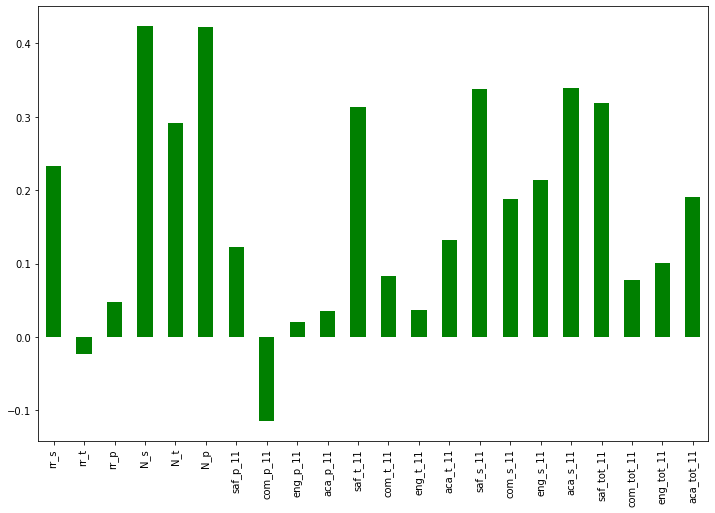

In [7]:
%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar(figsize=(12,8), color = 'green')

There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

## Plotting Enrollment

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment correlates strongly positively with sat_score, which is surprising, because you'd think smaller schools, which focused more on the student, would have higher scores. However, it looks like the opposite -- bigger schools tend to do better on the SAT.
    - Other columns that are proxies for enrollment, like total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS correlate as well.
- The percentage of females at a school (female_per), and the number of females (female_num) correlate positively with SAT score, whereas the percentage of males (male_per), and the number of males (male_num) correlate negatively. This potentially indicates than women do better on the SAT than men.
- How highly teachers and students rated safety at the school (saf_t_11, and saf_s_11) correlates with sat_score.
- How highly students rated academic standards (aca_s_11) correlates with sat_score, but this does not hold for teachers and parents (aca_p_11 and aca_t_11).
- There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of English language learners at the school (ell_percent, frl_percent) correlates strongly negatively with SAT scores.

Since enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a Dataframe using the plot accessor on a Dataframe. We can directly use different plot types. For example df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.

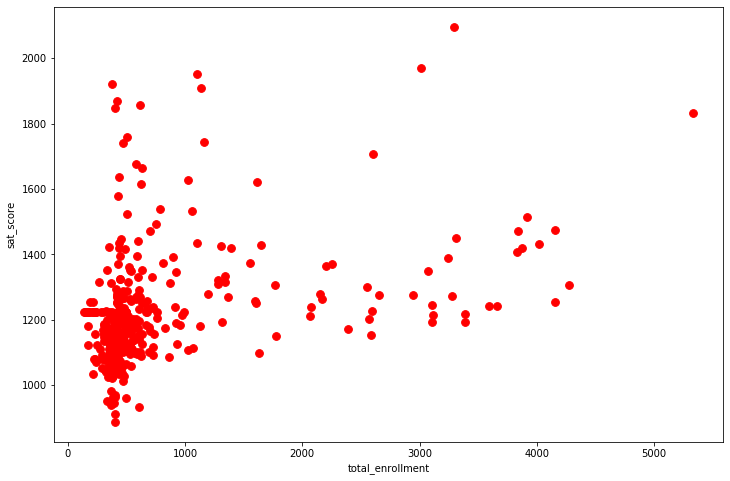

In [8]:
%matplotlib inline
combined.plot.scatter(x='total_enrollment', y='sat_score', figsize = (12, 8), s = 60, color ='red')
plt.show()

## Exploring Schools With Low SAT Scores And Enrollment

From looking at the plot we just generated, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all the points to be arranged in a line. Instead, there's a large cluster of schools, then a few schools going off in 3 different directions.

However, there is an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what is causing our r-value to be so high. It's worth extracting the names of the schools in this cluster, so we can research them more.

In [214]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


## Plotting Language Learning Percentage

From our research in the last screen, we found that most of the high schools with low total enrollment and low SAT scores are actually schools with a high percentage of English language learners enrolled. This indicates that it's actually ell_percent that correlates strongly with sat_score instead of total_enrollment. To explore this relationship more, let's plot out ell_percent vs sat_score.

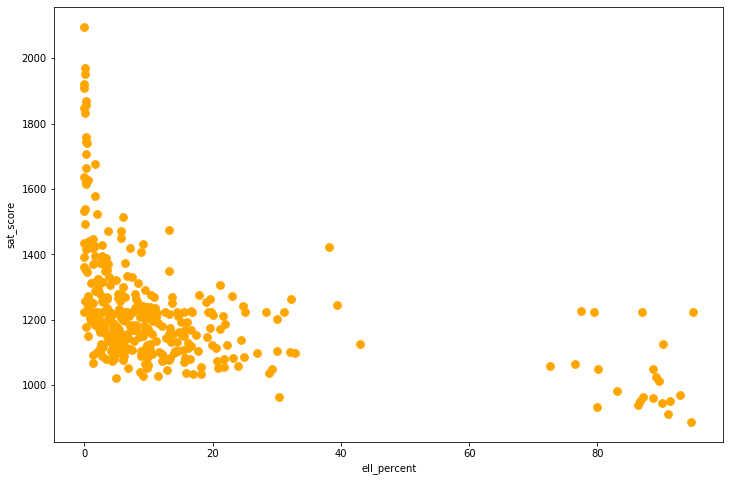

In [10]:
combined.plot.scatter(x='ell_percent', y='sat_score', figsize = (12,8), s=60, color = 'orange')
plt.show()

## Mapping The Schools

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster with very high ell_percent and low sat_score, which is the same group of international high schools that we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district, so we can more easily see which parts of the city have a lot of English language learners.

In order to do this, we'll need to be able to create maps. We extracted the coordinates of all the schools earlier, and stored them in the lat and lon columns. This will enable us to plot all of the schools onto a map of the US, centered on New York City.

The code above will create a plot, centered on New York City (llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the area that's shown), and will draw coastlines and rivers accordingly.

Now, all we need to do is convert our lat and lon coordinates into x and y coordinates so we can plot them on top of the map. This will show us where all the schools in our dataset are located.

In order to plot coordinates using basemap, we need to:

- Convert the Pandas Series containing the latitude and longitude to lists using the tolist method.
- Make a scatterplot using the longitudes and latitudes with the scatter method on the Basemap object.
- Show the plot using the show method.

Additionally, we need to make sure we pass a few keyword arguments to the scatter method:

- s -- this affects the size of the point that represents each school on the map.
- zorder -- this affects where the points that represent schools will be drawn in the z axis. If we set it to 2, the points will be drawn on top of the continents, which is where we want them.
- latlon -- this is a Boolean that specifies whether we're passing in latitude and longitude coordinates instead of x/y plot coordinates.

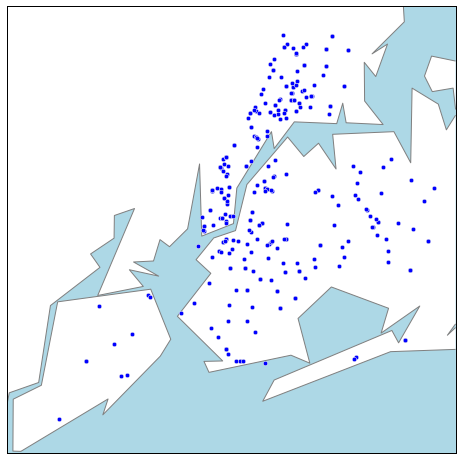

In [216]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(8,8))

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, marker = '.')

plt.show()

## Plotting Out Statistics

From the map above, we can see that schools are the most dense in Manhattan (the top of the map), and less dense in Brooklyn, The Bronx, Queens, and Staten Island.

Now that we can plot out the positions of the schools, we can start to display meaningful information on maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword argument c into the scatter method. The c keyword argument will accept a sequence of numbers, and will shade points corresponding to lower numbers or higher numbers differently.

Whatever sequence of numbers we pass into the c keyword argument will be converted to a range from 0 to 1. These values will then be mapped onto a color map. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points when the associated number is low, and yellow when it's high.

For example, let's say we plotted ell_percent by school. If we pass in the keyword argument

    c=combined["ell_percent"],

then any school with a high ell_percent would be shaded yellow, and any school with a low ell_percent would be shaded green. We can specify a colormap by passing the cmap keyword argument to the scatter method.

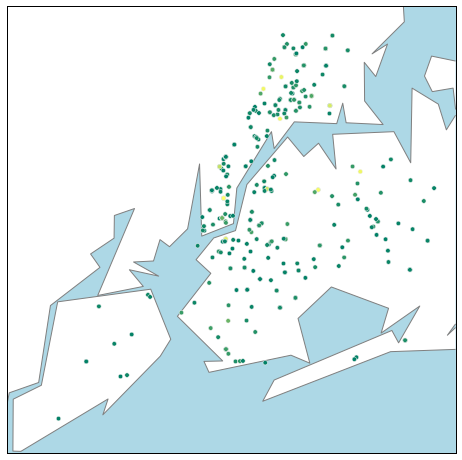

In [217]:
plt.figure(figsize=(8,8))

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, marker = '.', c=combined["ell_percent"], cmap="summer")
plt.show()

## Calculating District Level Statistics

Unfortunately, due to the number of schools, it's hard to interpret the map we made in the last screen. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make it easier to read very granular statistics is to aggregate them. In this case, we can aggregate based on district, which will enable us to plot ell_percent district by district instead of school by school.

In [218]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


## Plotting Ell_percent By District

Now that we've taken the mean of all the columns, we can plot out ell_percent by district. Not only did we find the mean of ell_percent, we also took the mean of the lon and lat columns, which will give us the coordinates for the center of each district.

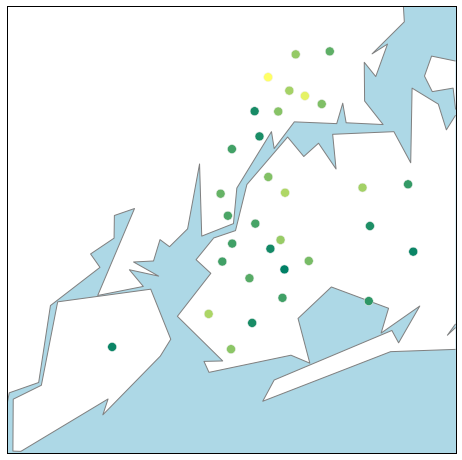

In [219]:
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')


longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

We can see that high ell_percent are shaded yellow, and any school with a low ell_percent are shaded green. There are only a few school districts with high ell_percent.

## Safety And SAT Scores

We'll investigate safety scores.

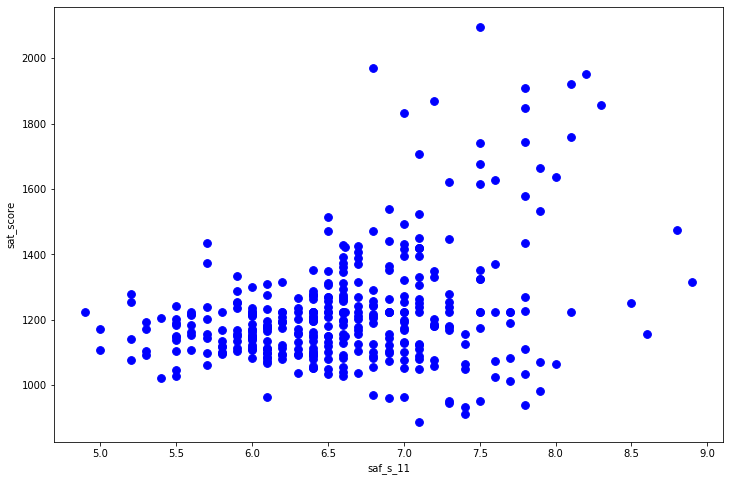

In [11]:
combined.plot.scatter("saf_s_11", "sat_score", figsize = (12,8), s =60, color = 'blue')

There appears to be a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

## Plotting safety

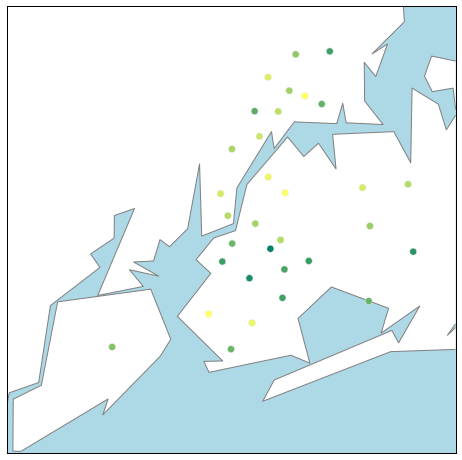

In [221]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)


plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have lower safety scores, whereas Brooklyn has high safety scores.

## Racial differences in SAT scores

There are a few columns that indicate the percentage of each race at a given school:

- white_per
- asian_per
- black_per
- hispanic_per

By plotting out the correlations between these columns and sat_score, we can see if there are any racial differences in SAT performance.

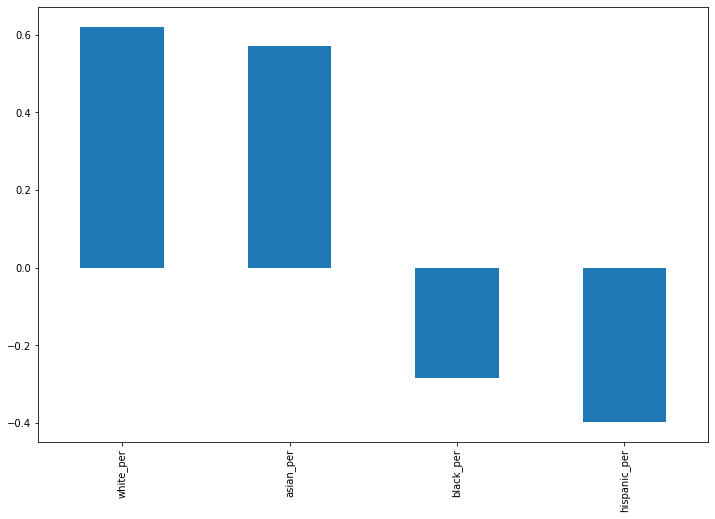

In [12]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar(figsize = (12,8))

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.


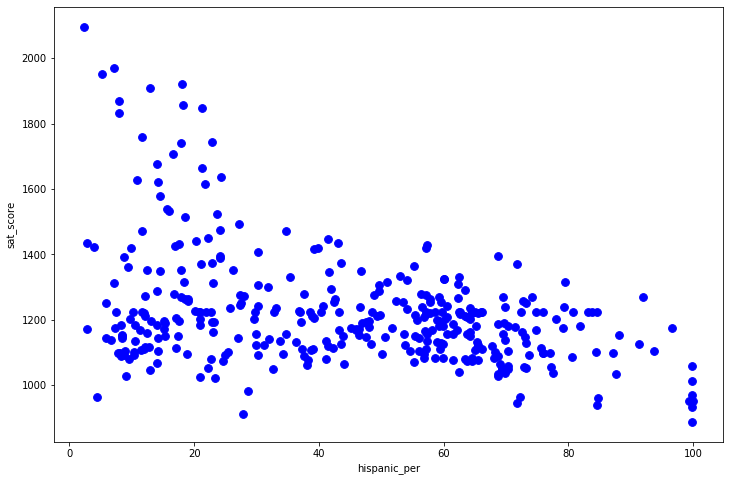

In [13]:
combined.plot.scatter("hispanic_per", "sat_score", figsize=(12,8), s =60, color = 'Blue')

In [224]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [225]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

## Gender Differences In SAT Scores

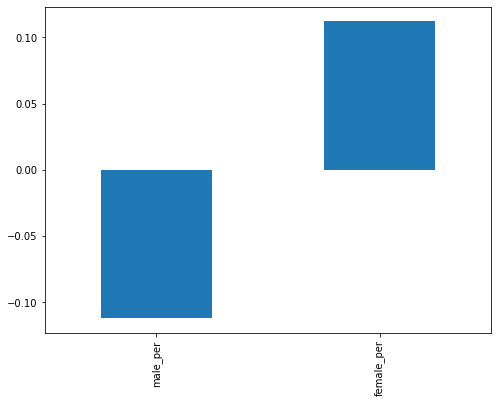

In [14]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar(figsize = (8, 6))

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

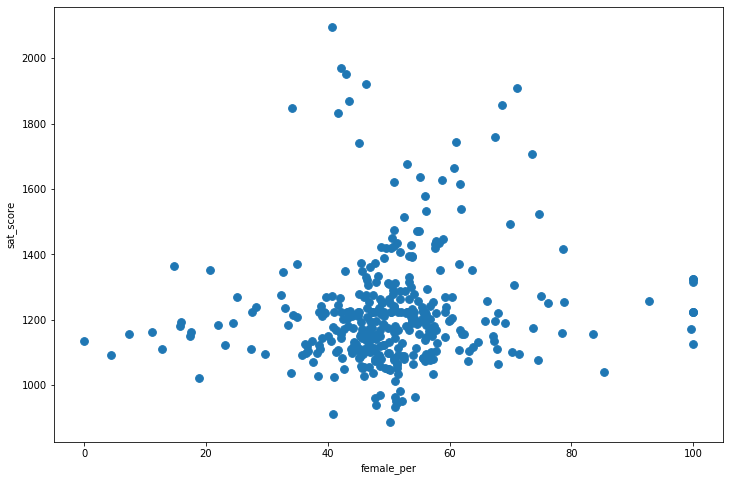

In [15]:
combined.plot.scatter("female_per", "sat_score", figsize = (12, 8), s = 60)

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [228]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appears to be very selective liberal arts schools that have high academic standards.

## AP Exam Scores Vs SAT Scores

In the US, the Advanced Placement, or AP, exams, are exams that high schoolers take in order to gain college credit. AP exams can be taken in many different subjects, and passing the AP exam means that colleges may grant you credits.

It makes sense that the number of students who took the AP exam in a school and SAT scores would be highly correlated, and let's dig into the relationship. Since total_enrollment is highly correlated with sat_score, we don't want to bias our results, so we'll instead look at the percentage of students in each school who took at least one AP exam.

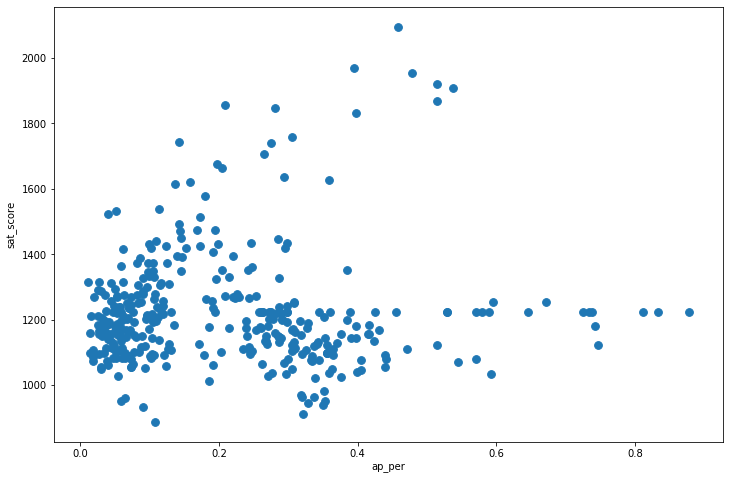

In [16]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score', figsize = (12, 8), s = 60)

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.

## Ideas For Further Exploration

There's still quite a bit of analysis left to do. Here are some potential next steps:

- Looking at class size and SAT scores.
- Figuring out the best area to live in based on school performance.
    - If we combine this with a property values dataset, we could find the cheapest place where there are good school.
- Looking into the differences between parent, teacher, and student responses to surveys.
- Assigning a score to schools based on sat_score and other attributes.
